In [41]:
#IMPORT ALL PACKAGES
import pandas as pd
from collections import Counter
import seaborn as sns
from sklearn.linear_model import Perceptron
import sklearn
import joblib
import numpy as np
import string
import re
import nltk
nltk.download("stopwords"); # Filtering (Stopword Removal)
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import sys
import pickle

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [42]:
# PACKAGE UNTUK CONNECT G-DRIVE N G-COLLAB 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [54]:
#LOAD DATA
dateset =("/content/sample_data/order_reviews_dataset.csv")
data =  pd.read_csv(dateset , sep=';')

data['review_comment_message'] = data['review_comment_message'].str.replace('\d+', '', regex=True) # Remove numbers from string
data['review_comment_message'] = data['review_comment_message'].apply(lambda x:x.lower()) # Change Strings to lowercase

data.head()

,review_comment_message,Label,score
0,"nã£o recebi o produto, solicito reembolso!",Negatif,1
1,apesar de chegar no ãºltimo dia do prazo estab...,Negatif,1
2,"a caixa dã¡ a impressã£o de produto usado, a q...",Negatif,1
3,meu profundo veio com defeito! jã¡ solicitei t...,Negatif,1
4,"no rastreio fala que foi entregue, porã©m nã£o...",Negatif,1


# Create Some Function

In [44]:
# Function to save and display wosrdcloud
def save_display_wordcloud(df_input, save_path, target_class):
    txt_review = " ".join(review for review in df_input.loc[df_input['pred_class'] == target_class].review_comment_message)
    
    if not txt_review: # check if string empty
        txt_review = 'null';

    # create the wordcloud object
    wordcloud = WordCloud(background_color='white', collocations=False).generate(txt_review)
    plt.imshow(wordcloud, interpolation='bilinear') # show wordcloud
    plt.axis("on") # view garis coordinate
    plt.savefig(save_path) 
    plt.show()


In [45]:
#Word Dictionary for model
vectorizer = joblib.load("/content/sample_data/vectorizer_review.pkl")
test_data = vectorizer.transform(data['review_comment_message']).toarray()
x_test = pd.DataFrame(data = test_data, columns = vectorizer.get_feature_names_out())
x_test

,00,001689,00x2,01,02,03,04,05,05ml,06,...,ãºnica,ãºnico,ãºteis,ãºtil,ãšltima,ãšnica,ãšnico,ãƒo,ðÿ,šðÿ
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4850,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4851,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4853,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Load Model

In [46]:
#LOAD Machine Learning Model
filename = '/content/sample_data/Random_Forest_classifier_review.model'

loaded_model = pickle.load(open(filename, 'rb'))
loaded_model

RandomForestClassifier(n_estimators=4, random_state=42)

# Predict Probability for each Review

In [47]:
#probability
pred_proba = loaded_model.predict_proba(x_test)
pred_proba

  # Create columns for each sentiment prediction
class_pos = [];
class_neg = [];
class_neu = [];
label_pred_namual = [];
    
for score in pred_proba:
  class_pos.append(str(round((score[0]*100), 3))+"%");
  class_neg.append(str(round((score[1]*100), 3))+"%");
  class_neu.append(str(round((score[2]*100), 3))+"%");
  
  if score[0] >= score[1] and score[0] >= score[2]:
    label_pred_namual.append("Pos");  
  elif score[2] >= score[1] and score[2] >= score[0]:
    label_pred_namual.append("Neu");
  else:
    label_pred_namual.append("Neg");

data["pred_class"] = label_pred_namual
x_test["pred_class"] = label_pred_namual
x_test["pred_pos"] = class_pos
x_test["pred_neg"] = class_neg
x_test["pred_neu"] = class_neu

# replace prediction class to a label name
data["pred_class"] = data["pred_class"].replace([0.0, 1.0, 2.0], ['Pos','Neg','Neu'])
x_test["pred_class"] = x_test["pred_class"].replace([0.0, 1.0, 2.0], ['Pos','Neg','Neu'])
    

In [48]:
# Data distribution for each class
dst_train = Counter(x_test['pred_class'])
# declare data
if dst_train.get('Pos') == None:
  data_values = [0, dst_train.get('Neu'), dst_train.get('Neg')]
  key_class_name = ['Positive (0)', 'Neutral ('+str(data_values[2])+')','Negative ('+str(data_values[1])+')'];
elif dst_train.get('Neu') == None:
  data_values = [dst_train.get('Pos'), 0, dst_train.get('Neg')]
  key_class_name = ['Positive ('+str(data_values[0])+')', 'Netral (0)','Negative ('+str(data_values[1])+')'];
elif dst_train.get('Neg') == None:
  data_values = [dst_train.get('Pos'), 0, dst_train.get('Neg')]
  key_class_name = ['Positive ('+str(data_values[0])+')', 'Negative ('+str(data_values[2])+')', 'Netral (0)'];
else:
  data_values = [dst_train.get('Pos'),dst_train.get('Neu'), dst_train.get('Neg')]
  key_class_name = ['Positive ('+str(data_values[0])+')', 'Neutral ('+str(data_values[2])+')','Negative ('+str(data_values[1])+')'];
      

# **Result Vizualization**

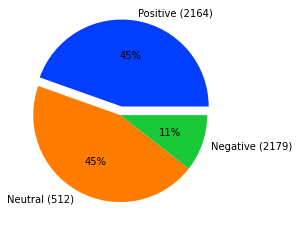

In [49]:
# declaring exploding pie
explode = [0.1, 0, 0]  

# define Seaborn color palette to use
palette_color = sns.color_palette('bright')

# plotting data on chart
plt.pie(data_values, labels=key_class_name, explode=explode, colors=palette_color, autopct='%.0f%%')
plt.show()     

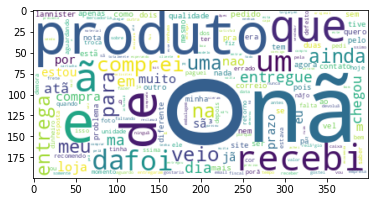

In [50]:
#POSITIVE SENTIMENT
img_path = "pos_sentiment.png"
input_target_class = "Pos"; 
save_display_wordcloud(data, img_path, input_target_class);
plt.show()

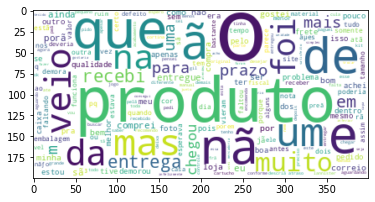

In [51]:
# NEGATIVE SENTIMENT
img_path = "pos_sentiment.png"
input_target_class = "Neg"; 
save_display_wordcloud(data, img_path, input_target_class);
plt.show()

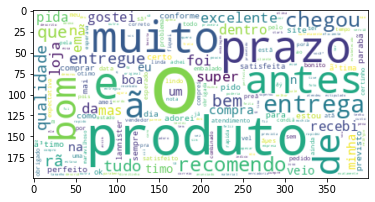

In [52]:
# NEUTRAL SENTIMEN
img_path = "pos_sentiment.png"
input_target_class = "Neu"; 
save_display_wordcloud(data, img_path, input_target_class);
plt.show()